In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import matplotlib
import time
import numpy as np
%matplotlib inline

import pandas as pd
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 100


In [25]:
#Model File Directory
WORK_DIR = '/var/spark/ml_files/'

#Label Keys
LABEL = "success"

MODEL_TYPE = "ML-ECO"





In [3]:
# from cassandra
from cassandra.cluster import Cluster
cassandra_endpoint = '10.62.1.118'
cluster = Cluster([cassandra_endpoint])


In [ ]:
eco =  pd.read_csv(WORK_DIR + 'eco_all_2019_01_to_03.csv')
eco.shape

In [ ]:
eco_2018_1 =  pd.read_csv(WORK_DIR + 'eco_2018_01_to_06.csv')
eco_2018_1.shape

In [ ]:
eco_2018_2 =  pd.read_csv(WORK_DIR + 'eco_2018_07_to_12.csv')
eco_2018_2.shape

In [22]:
eco_2018_1 = eco_2018_1[~eco_2018_1['added_expiry_years'].isna()]
eco_2018_1.shape

(2561632, 56)

In [ ]:
eco = pd.concat([eco, eco_2018_1, eco_2018_2], ignore_index=True)
eco['cc_expiration_date'] = eco['cc_expiration_date'].apply(str)
eco.shape

In [23]:
# eco_2018_2.to_csv(WORK_DIR + 'eco_2018_07_to_12.csv')
# eco_2018_1.to_csv(WORK_DIR + 'eco_2018_01_to_06.csv')

In [15]:
eco_2018_2 = eco_2018_2[~eco_2018_2['added_expiry_years'].isna()]
eco_2018_2

,Unnamed: 0,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1
3,3,2018-07-05,acd,10289267701,7010595233,2018-07-05 07:28:15,0.0,RB,Societe Generale S.A.,FR,415056.0,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,1017,NaN,0.0,5,thursday,35185729-c017-42b7-bb7b-936e5a41b85e,3788691.0,Debit,FR,DRI*ACD Systems,1785390597,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.99,22.108158,EUR,Visa,netgiro-bnp,1.0,18.99,22.108158,EUR,49625818400,27001,Transaction refused[05] [] [] [],New,13739217000,2018-07-05 02:28:15,2,Authorize,0,10.0,51.544971,56.856817,2.990000,124.627536,30.225956,92.929982,116.086890,2.990000
4,4,2018-07-05,acd,10289267701,7010595363,2018-07-05 07:28:17,0.0,NON3DS,Societe Generale S.A.,FR,415056.0,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,1017,RETRY_DECLINED.2,0.0,5,thursday,9d6b1306-414f-4fc8-9f9b-d94b1daed59e,3788691.0,Debit,FR,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.99,22.108158,EUR,Visa,netgiro-bms,1.0,18.99,22.108158,EUR,49625818400,27001,Transaction refused[05] [] [111800] [111800],New,13739217000,2018-07-05 02:28:17,2,Authorize,0,10.0,51.544971,56.856817,2.990000,124.627536,30.225956,92.929982,116.086890,2.990000
16,16,2018-07-05,acd,2770445809,7010266473,2018-07-05 05:50:58,3.0,NON3DS,UBS SWITZERLAND AG,CH,510197.0,MasterCard,MasterCard World Card,Consumer,True credit (No PIN/Signature capability),0720,NaN,3.0,5,thursday,bd8a8f82-7d2d-4709-870e-220ecff8ad83,3800941.0,Credit,CH,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,22.00,25.612400,EUR,MasterCard,netgiro-bms,1.0,22.00,25.612400,EUR,49622118500,0,SUCCESS[00] [754746] [111800] [111800],New,13728444700,2018-07-05 00:50:58,0,Authorize,1,7.0,54.448239,52.125550,2.680000,1414.070000,35.996791,101.154272,136.788000,11.981007
17,17,2018-07-05,acd,2770445909,7010266373,2018-07-05 05:50:55,3.0,NON3DS,UBS SWITZERLAND AG,CH,510197.0,MasterCard,MasterCard World Card,Consumer,True credit (No PIN/Signature capability),0720,NaN,3.0,5,thursday,42afd494-ea38-4e5d-b481-396f9251554a,3800941.0,Credit,CH,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,14.99,17.451358,EUR,MasterCard,netgiro-bms,1.0,14.99,17.451358,EUR,49622124100,0,SUCCESS[00] [209045] [111800] [111800],New,13728417200,2018-07-05 00:50:55,0,Authorize,1,7.0,54.448239,52.125550,2.680000,1414.070000,35.996791,101.154272,136.788000,11.981007
23,23,2018-07-05,acd,3387636201,7010517633,2018-07-05 07:14:28,0.0,RB,BPCE,FR,497886.0,Visa,Visa Classic,Consumer,True credit (No PIN/Signature capability),0917,NaN,0.0,5,thursday,914dbf43-bb8d-4238-b7c5-f73c9b7d992c,3787161.0,Credit,FR,DRI*ACD Systems,1785390597,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,22.00,25.612400,EUR,Visa,netgiro-bnp,3.0,22.00,25.612400,EUR,49625022900,27001,Transaction refused[56] [] [] [],New,13633339400,2018-07-05 02:14:28,2,Authorize,0,9.0,59.978698,58.663265,2.990000,176.247604,21.304532,94.006648,114.602297,40.363764
24,24,2018-07-05,acd,3387636201,7010517833,2018-07-05 07:14:30,0.0,NON3DS,BPCE,FR,497886.0,Visa,Visa Classic,Consumer,True credit (No PIN/Signature capability),0917,RETRY_DECLINED.2,0.0,5,thursday,44b71e27-3920-4193-9e6f-2d36de708ad0,3787161.0,Credit,FR,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,22.00,25.612400,EUR,

In [29]:
# eco.to_csv(WORK_DIR + 'eco_all_2019_01_to_03.csv')

In [26]:
eco['success'].value_counts(normalize=True)

0    0.84841
1    0.15159
Name: success, dtype: float64

In [33]:
eco.shape

(7174062, 65)

In [ ]:
eco['added_expiry_years'].unique()

In [40]:
eco['added_expiry_years'].value_counts()

3        645272
0        391135
4        188775
5        112561
2         60416
6         39985
3         21171
8         14643
0         12036
1         11839
4          7063
5          3746
10         3204
9          2977
12         1823
6          1730
2          1504
7          1314
8           870
1           372
9           262
12          203
11          126
10          120
15           98
7            49
11           11
15            8
-2            8
STALE         7
-3            7
-1            6
-5            4
13            3
-4            3
Name: added_expiry_years, dtype: int64

In [5]:
bin_profile = pd.read_csv(WORK_DIR + 'bin_profile_2018_01_to_2019_03.csv')
bin_profile.shape

(38193, 13)

In [6]:
original_size = len(eco)
# balanced_size = len(retry_success_balanced_all)
fail_size = eco[LABEL].value_counts(normalize=True)[0.0]
success_size =  eco[LABEL].value_counts(normalize=True)[1.0]

In [6]:
# import numpy as np

# def year_diff(row):
#     year_added = -100
#     try:
#         if pd.isnull(row['cc_expiration_date']) or pd.isnull(row['failed_cc_expiration_date']):
#             return year_added
#         if len(row['cc_expiration_date']) >=2 and len(row['failed_cc_expiration_date']) >=2:
#             expire_date = int(row['failed_cc_expiration_date'][-2:])
#             new_expire_date = int(row['cc_expiration_date'][-2:])
#             year_added = new_expire_date - expire_date
#     except Exception as ex:
# #         print("Sub_id {}, ex: {}".format(row['subscription_id'], ex))
# #         year_added = -100
#           raise ex
#     return year_added


# def eco_value(row):
#     eco_value = "NONE"
#     try:
#         if pd.isnull(row['cc_expiration_date']) or pd.isnull(row['failed_cc_expiration_date']):
#             return eco_value
#         if row['cc_expiration_date'] == '0000':
#             return '0000'
#         if len(row['cc_expiration_date']) >=4 and len(row['failed_cc_expiration_date']) >=4:
#             expire_year = int(row['failed_cc_expiration_date'][-2:])
#             new_expire_year = int(row['cc_expiration_date'][-2:])
#             year_added = new_expire_year - expire_year
#             expire_month = int(row['failed_cc_expiration_date'][:2])
#             new_expire_month = int(row['cc_expiration_date'][:2])
#             month_added = new_expire_month - expire_month

#             if year_added < 0:
#                 return "MINUS"
#             if month_added < 0:
#                 month_added = month_added + 12
#             eco_value = "{:0>2d}{:0>2d}".format(month_added, year_added)
#     except Exception as ex:
# #         print("Sub_id {}, ex: {}".format(row['subscription_id'], ex))
# #         year_added = -100
#           raise ex
#     return eco_value

In [8]:
# FEATURES_FLOAT = ['bin', 'renew_att_num', 'failed_response_code']
# FEATURES_FLOAT = ['bin', 'added_expiry_years']
FEATURES_FLOAT = ['bin']
def handle_feat_float(df):
        for feat in FEATURES_FLOAT:
            if feat in FEATURES_FLOAT:
                df[feat] = df[feat].apply(str).str.replace('.0', '', regex=False)
        return df

# handle_feat_float(eco)    
handle_feat_float(bin_profile)    

# retry_success.head()

,Unnamed: 0,Unnamed: 0.1,bin,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,Min_10,count
0,0,0,230540,23.170809,25.550000,6.990000,52.900000,12.315995,45.725000,50.275000,9.100000,9.100000,126
1,1,2,352811,37.533333,40.000000,32.000000,40.600000,4.801389,40.540000,40.588000,33.600000,33.600000,3
2,2,5,352815,172.055652,53.700000,18.000000,562.822610,261.654900,489.709218,548.199932,22.200000,22.200000,4
3,3,6,352818,15.643014,4.944068,4.800000,51.479167,16.386331,40.881000,49.359534,4.800000,4.800000,12
4,4,7,352820,39.909110,32.177332,30.700000,73.000000,16.556696,64.725000,71.345000,31.100000,31.100000,6
5,5,8,352821,49.015144,49.159598,48.102689,50.518630,0.988569,50.246824,50.464269,48.115695,48.115695,5
6,6,9,352822,35.688928,39.518769,18.714051,49.360468,9.785019,49.219043,49.332183,21.110764,21.110764,13
7,7,10,352823,41.450000,30.900000,30.900000,73.100000,21.100000,66.770000,71.834000,30.900000,30.900000,4
8,8,11,352824,56.229756,55.059513,40.000000,74.800000,14.297354,71.997854,74.239571,44.200000,44.200000,4
9,9,12,352830,38.264198,40.300000,30.800000,41.656793,5.019725,41.483274,41.622089,33.590000,33.590000,4


In [57]:
#import for training
import numpy as np
from sklearn import cross_validation
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn import linear_model
from sklearn import tree
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import linear_model
from sklearn import svm
from sklearn.dummy import DummyClassifier
# from sklearn.model_selection import GridSearchCV
from spark_sklearn import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

# from src.web.utils import PreProcessing
from src.web.preprocessing import PreProcessing
from src.web.encoder import EnhancedLeaveOneOutEncoder
from src.web.train_util import *

In [8]:
INPUT_FEATURES = {
            "billing_country": {
                "type": "string"
            },
            "bin": {
                "type": "string"
            },
            "card_brand": {
                "type": "string"
            },
            "card_category": {
                "type": "string"
            },
            "card_class": {
                "type": "string"
            },
            "card_usage": {
                "type": "string"
            },
            "cc_expiration_date": {
                "type": "string"
            },
            "day_of_month": {
                "type": "integer"
            },
            "funding_source": {
                "type": "string"
            },
            "issuer_country": {
                "type": "string"
            },
            "merchant_number": {
                "type": "string"
            },
            "payment_amount_usd": {
                "type": "number"
            },
            "payment_currency": {
                "type": "string"
            },
            "payment_method_id": {
                "type": "string"
            },
            "payment_service_id": {
                "type": "string"
            },
            "transaction_date_in_string": {
                "type": "string"
            },
            "added_expiry_years": {
                "type": "number"
            }
        }

In [159]:
# eco.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace=True, axis=1)
# eco['Mean'] = 0
eco

,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,is_expired,added_years,Mean
0,2019-02-15,acd,2462462809,8297439003,2019-02-15 06:17:16,0,NON3DS,UBS Switzerland AG,LI,454713,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,NaN,0.0,15,friday,74919cdc-4f67-4a5c-8905-8f13fa4d6981,2.13696e+06,Credit,CH,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,14.99,16.89,EUR,Visa,netgiro-bms,3,14.99,16.89,EUR,57992095700,27001.0,Transaction refused[05] [] [111800] [111800],New,15251946800,2019-02-15 00:17:16,0,Authorize,0,12,True,0,0
1,2019-02-15,acd,2462462809,8297439053,2019-02-15 06:17:17,0,NON3DS,UBS Switzerland AG,LI,454713,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,RETRY_DECLINED.2,0.0,15,friday,5ad50927-dc3c-49be-8b6e-0fcd5e06827c,2.13696e+06,Credit,CH,DRI*ACD Systems,1009072982,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,14.99,16.89,EUR,Visa,drwp-fd,3,14.99,16.89,EUR,57992095700,27001.0,Transaction refused[null] [null] [null] [null],New,15251946800,2019-02-15 00:17:17,0,Authorize,0,12,True,0,0
2,2019-02-15,acd,2463604509,8297439033,2019-02-15 06:17:16,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),0122,NaN,NaN,15,friday,69e7d16b-7e89-45b4-9847-4bb33a005a0a,NaN,Credit,KR,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.69,18.69,USD,Visa,netgiro-bms,3,18.69,18.69,USD,57991656200,22053.0,Expired card.[54] [] [111800] [111800],New,15252060500,2019-02-15 00:17:16,0,Authorize,0,1,False,3,0
3,2019-02-15,acd,2463604509,8297439063,2019-02-15 06:17:18,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),0122,RETRY_DECLINED.2,NaN,15,friday,2d1ee0f5-97c0-4531-8ed0-28aded5b3a4d,NaN,Credit,KR,DRI*ACD Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.69,18.69,USD,Visa,netgiro-seb,3,18.69,18.69,USD,57991656200,27001.0,Transaction refused[54] [000000] [] [],New,15252060500,2019-02-15 00:17:18,0,Authorize,0,1,False,3,0
4,2019-02-15,acd,2489810409,8297458043,2019-02-15 06:21:02,0,NON3DS,BAWAG P.S.K. BANK,AT,526624,MasterCard,MasterCard Credit Card (mixed BIN),Consumer,Credit - True credit (No PIN/Signature capability),0716,NaN,0.0,15,friday,5b0c7223-03d9-4c5b-806d-e0f86a24b469,1.9407e+06,Credit,AT,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,14.99,16.89,EUR,MasterCard,netgiro-bms,1,14.99,16.89,EUR,57992331400,0.0,SUCCESS[00] [526463] [111800] [111800],New,15383570200,2019-02-15 00:21:02,0,Authorize,1,7,True,0,0
5,2019-02-15,acd,2490453009,8297458393,2019-02-15 06:21:07,0,NON3DS,CORNER BANCA S.A.,CH,548659,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,Credit - True credit (No PIN/Signature capability),1015,NaN,0.0,15,friday,4cd01247-1319-45a4-88f9-ea09bff2bb49,2.03374e+06,Credit,CH,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,22.00,24.80,EUR,MasterCard,netgiro-bms,1,22.00,24.80,EUR,57992331600,27001.0,Transaction refused[05] [] [111800] [111800],New,15383590900,2019-02-15 00:21:07,0,Authorize,0,10,True,0,0
6,2019-02-15,acd,2490453009,8297458613,2019-02-15 06:21:09,0,NON3DS,CORNER BANCA S.A.,CH,548659,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,Credit - True credit (No PIN/Sign

In [12]:
eco = pd.merge(eco, bin_profile[['bin','Mean', 'Median','Min','Max','StdDev','Max_95','Max_99','Min_1']], left_on='bin', right_on='bin', how='left')

eco.shape  #10761324, 61   7343847, 63

(1523351, 60)

In [61]:
eco['added_expiry_years'].value_counts(dropna=False)

3        3599591
0        1534129
4         816570
5         658152
6         262862
2         175692
8          43435
1          36400
9          20721
10         14775
12          6576
7           4350
11           323
15           214
-3           103
-2            61
-1            60
-4            28
13             8
STALE          7
-5             4
-6             1
Name: added_expiry_years, dtype: int64

In [59]:
FEATURES_CAT = ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 
                 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 
                'payment_service_id', 'payment_method_id', 'bin', 
                'payment_currency', 'added_expiry_years',  'bank_code']

# FEATURES_CAT = ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 
#                  'day_of_month', 'billing_country', 'merchant_number', 
#                 'payment_service_id', 'payment_method_id', 'bin', 
#                 'added_expiry_years',  'bank_code', 'cc_month', 'is_expired']


FEATURES_FLOAT = ['bin', 'added_expiry_years']
FEATURES_NUM = ['payment_amount_usd']
FEATURES_NUM_CALCULATED = ['max_99_diff', 'std_diff', 'median_diff', 'mean_diff']

# FEATURES_ENCODED =  [ 'week_of_month', 'day_of_week', 'Mean', 'Median', 'Max', 'StdDev', 'Max_99', 'is_expired', 'month'] + FEATURES_NUM_CALCULATED
FEATURES_NUM_ENCODED = ['Mean', 'Median', 'Max', 'StdDev', 'Max_99']

FEATURES_ENCODED = [ 'week_of_month', 'day_of_week', 'month', 'cc_month'] + FEATURES_NUM_CALCULATED


FEATURES = FEATURES_CAT + FEATURES_ENCODED


# from sklearn.model_selection import GridSearchCV
from spark_sklearn import GridSearchCV


from src.web.preprocessing import PreProcessing
from src.web.preprocessing import make_pipeline
from sklearn.preprocessing import Imputer

# FIELDS = FEATURES_CAT + FEATURES_NUM + ['transaction_date_in_string', 'cc_expiration_date', 'failed_attempt_date', 'failed_cc_expiration_date'] + FEATURES_NUM_ENCODED + FEATURES_NUM_CALCULATED
FIELDS = FEATURES_CAT + FEATURES_NUM + ['transaction_date_in_string', 'cc_expiration_date'] + FEATURES_NUM_ENCODED + FEATURES_NUM_CALCULATED

# df_decline_type = pd.read_csv(WORK_DIR + 'Decline_Type.csv')

features_dict = {'FEATURES_CAT': FEATURES_CAT, 'FEATURES_NUM':FEATURES_NUM, 'FEATURES_ENCODED':FEATURES_ENCODED, 'FEATURES_NUM_ENCODED':FEATURES_NUM_ENCODED, 'FEATURES_NUM_CALCULATED':FEATURES_NUM_CALCULATED, 'FEATURES_FLOAT': FEATURES_FLOAT}
features_dict_key = 'preprocessing__features_dict'
# bin_profile = None
def get_feat_importances(pipe, model_name, df_features):
    classifier = pipe.named_steps[model_name]
    feature_importance = classifier.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    print("feature_importance column ",df_features.columns[sorted_idx])
    print("feature_importance val ",feature_importance[sorted_idx])
    print('sorted_idx: ', sorted_idx)
    feature_importance_vals = feature_importance[sorted_idx]
    feature_importance_columns = df_features.columns[sorted_idx]
    return feature_importance_columns, feature_importance_vals, sorted_idx

def display_feature_importance(pcols, pvals, sorted_idx):
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(8,12))
    plt.barh(pos, pvals, align='center')
    plt.yticks(pos, pcols)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')

def build_and_train(df, clf, param_grid, model_name, model_file = '', best_param=None):
    model_prefix = model_name + '__'
    time_start = time.time()

    df_X = df[FIELDS]
 
    result_dict = {}
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(df_X, df[LABEL], \
                                                        test_size=0.15, random_state=42)
    
    y_pred_train = None
 
    if best_param is None:
    
        pipe = make_pipeline(PreProcessing(bin_profile), Imputer(strategy="most_frequent", axis=0), clf())
#         pipe = make_pipeline(PreProcessing(bin_profile), clf())
        score = 'precision_weighted' #'average_precision'#'f1' #'accuracy' #  ['accuracy','precision_macro', 'recall_macro', 'f1_macro']
        print("# Tuning hyper-parameters for %s" % score)
        
        pipe_param_grid = {model_prefix + k: v for k, v in param_grid.items()}
        print("pipe_param_grid ", pipe_param_grid)
        
        clf_gs = GridSearchCV(sc, pipe, pipe_param_grid, cv=3, scoring=score, n_jobs=-1, fit_params={features_dict_key: features_dict})
#         clf_gs = GridSearchCV(pipe, pipe_param_grid, cv=3, scoring=score, n_jobs=-1, fit_params={features_dict_key: features_dict})
        clf_gs = clf_gs.fit(x_train, y_train)

        print('clf_gs: {}'.format(clf_gs))
 
        best_model = clf_gs.best_estimator_  #clf_gs.estimator.named_steps[model_name]
        print('best params: {}'.format(best_model.get_params(deep=True)))
#         print('best xgb params: {}'.format(best_model.get_xgb_params()))
        result_dict['hyper_params'] = str(best_model.get_params(deep=True)) #clf_gs.best_params_
        print("# Grid scores on development set:")
        means = clf_gs.cv_results_['mean_test_score']
        stds = clf_gs.cv_results_['std_test_score']
        zipped = list(zip(means, stds, clf_gs.cv_results_['params']))
        for mean, std, params in sorted(zipped, key = lambda x: x[0]) :
            print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

        best_parameters = best_model.get_params(deep=True)
        print("# Best parameters set found on development set: {}".format(best_parameters))  

        best_parameters = {k.replace(model_prefix,''): v for k, v in best_parameters.items()}
        print('best params: {}'.format(best_parameters))
        pipe = best_model
        y_pred_train = pipe.predict(x_train).round()
    else:
        best_parameters= best_param
        pipe = make_pipeline(PreProcessing(bin_profile), Imputer(strategy="most_frequent", axis=0), clf(**best_parameters))
        result_dict['hyper_params'] = str(best_parameters)

    if y_pred_train is None:
        if model_file != '':
            best_parameters['updater'] = 'refresh'
            best_parameters['refresh_leaf'] = True


        if model_name == 'xgbclassifier':
            print("training xgb ....... ")
            if model_file == '':
                y_pred_train = pipe.fit_predict(x_train, y_train, preprocessing__features_dict=features_dict, xgbclassifier__eval_metric='error').round()  
            
            else:
                print("Using model_file to train: ", model_file)
                y_pred_train = pipe.fit_predict(x_train, y_train, preprocessing__features_dict=features_dict, xgbclassifier__xgb_model=model_file, xgbclassifier__eval_metric='error').round()  
        
        else:        
            y_pred_train = pipe.fit_predict(x_train, y_train, preprocessing__features_dict=features_dict).round()  
    
    print("best_parameters ", best_parameters)        
    print("x_train", x_train.shape)
    print("x_test", x_test.shape)
        
    print("pipe:", pipe)
    train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
    print("training accuracy:", train_accuracy)
    
    train_auc = metrics.roc_auc_score(y_train, y_pred_train)
    print("training auc:", train_auc)
    
    train_class_report = metrics.classification_report(y_train, y_pred_train)
    print(train_class_report)

    
    y_pred_test = pipe.predict(x_test).round()

    training_time = time.time() - time_start
    print("# training time:", training_time)
    result_dict['training_time'] = training_time
    
    '''Dummy classifier for comparison'''
    clf_d = DummyClassifier(strategy='most_frequent')
    clf_d.fit(np.zeros_like(x_train), y_train.astype(np.float))
    y_pred_test_dummy = clf_d.predict(np.zeros_like(x_test)).round()
    accuracy_dummy = metrics.accuracy_score(y_test, y_pred_test_dummy)
    '''End of Dummy Classifier'''
    
    test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
    
    result_dict['accuracy_dummy'] = accuracy_dummy
    result_dict['train_accuracy'] = train_accuracy
    result_dict['test_accuracy'] = test_accuracy
#     print_accuracy_report(pipe, x_train, y_train, num_validations=3)
#     print(metrics.classification_report(y_test, y_pred_test))
    test_class_report = metrics.classification_report(y_test, y_pred_test)
    result_dict['train_class_report'] = train_class_report
    result_dict['test_class_report'] = test_class_report
    conf_mx = metrics.confusion_matrix(y_test, y_pred_test)
    
    preprocess = pipe.named_steps['preprocessing']
    df_features = x_train[preprocess.features_all]
    
    feat_importance_cols, feat_importance_vals, sorted_idx =  get_feat_importances(pipe, model_name, df_features)
    display_feature_importance(feat_importance_cols, feat_importance_vals, sorted_idx)
    
    result_dict['feature_importance_columns'] = str(feat_importance_cols)
    result_dict['feature_importance_vals'] = str(feat_importance_vals)
    result_dict['sorted_idx'] = str(sorted_idx)
    
    test_auc = metrics.roc_auc_score(y_test, y_pred_test)
    result_dict['train_auc'] = train_auc
    result_dict['test_auc'] = test_auc
    
    print("accuracy_dummy:", accuracy_dummy)
    
    
    print("test accuracy:", test_accuracy)
    print("test auc:", test_auc)
    print(test_class_report)
    
    print("# confusion_matrix -  test:\n", conf_mx)
    result_dict['conf_mx'] = conf_mx.tolist()

    return pipe, result_dict


In [48]:
PAY_AMOUNT_USD = "payment_amount_usd"

BIN = 'bin'
MEAN = 'Mean'
STD_DEV = 'StdDev'
MEAN_DIFF = "mean_diff"
MAX_95_DIFF = "max_95_diff"
MAX_99_DIFF = "max_99_diff"
STD_DIFF = "std_diff"

eco['mean_diff'] = eco[MEAN] - eco[PAY_AMOUNT_USD]
# retry_success['max_95_diff'] = retry_success['Max_95'] - retry_success[PAY_AMOUNT_USD]
eco['median_diff'] = eco['Median'] - eco[PAY_AMOUNT_USD]
eco['max_99_diff'] = eco['Max_99'] - eco[PAY_AMOUNT_USD]
eco['std_diff'] = eco[STD_DEV] - abs(eco['mean_diff']) 
eco.head()

,Max,Max_95,Max_99,Mean,Median,Min,Min_1,StdDev,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,added_expiry_years,added_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cc_month,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,is_expired,issuer_country,max_99_diff,mean_diff,median_diff,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,received_date,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,site_id,status,std_diff,subscription_id,subsegment_id,success,transaction_date,transaction_date_in_string,transaction_hour,transaction_id,transaction_type
0,488.960000,110.044830,158.540509,60.433945,59.000000,2.68,24.626213,36.392530,0,0.0,0.0,0.0,0,0,NON3DS,UBS Switzerland AG,LI,454713,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,12.0,NaN,0.0,15,friday,74919cdc-4f67-4a5c-8905-8f13fa4d6981,2.13696e+06,Credit,True,CH,141.650509,43.543945,42.110000,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,14.99,16.89,EUR,Visa,netgiro-bms,2019-02-15,3.0,14.99,16.89,EUR,57992095700,27001,Transaction refused[05] [] [111800] [111800],acd,New,-7.151415,2462462809,1.525195e+10,0,2019-02-15 06:17:16,2019-02-15 00:17:16,0,8297439003,Authorize
1,488.960000,110.044830,158.540509,60.433945,59.000000,2.68,24.626213,36.392530,1,1.0,1.0,1.0,0,0,NON3DS,UBS Switzerland AG,LI,454713,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,12.0,RETRY_DECLINED.2,0.0,15,friday,5ad50927-dc3c-49be-8b6e-0fcd5e06827c,2.13696e+06,Credit,True,CH,141.650509,43.543945,42.110000,DRI*ACD Systems,1009072982,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,14.99,16.89,EUR,Visa,drwp-fd,2019-02-15,3.0,14.99,16.89,EUR,57992095700,27001,Transaction refused[null] [null] [null] [null],acd,New,-7.151415,2462462809,1.525195e+10,0,2019-02-15 06:17:17,2019-02-15 00:17:17,0,8297439053,Authorize
2,670.127693,53.101640,55.919678,21.088691,16.500000,6.99,9.778057,19.128329,2,2.0,2.0,2.0,3,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),0122,1.0,NaN,NaN,15,friday,69e7d16b-7e89-45b4-9847-4bb33a005a0a,NaN,Credit,False,KR,37.229678,2.398691,-2.190000,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.69,18.69,USD,Visa,netgiro-bms,2019-02-15,3.0,18.69,18.69,USD,57991656200,22053,Expired card.[54] [] [111800] [111800],acd,New,16.729637,2463604509,1.525206e+10,0,2019-02-15 06:17:16,2019-02-15 00:17:16,0,8297439033,Authorize
3,670.127693,53.101640,55.919678,21.088691,16.500000,6.99,9.778057,19.128329,3,3.0,3.0,3.0,3,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),0122,1.0,RETRY_DECLINED.2,NaN,15,friday,2d1ee0f5-97c0-4531-8ed0-28aded5b3a4d,NaN,Credit,False,KR,37.229678,2.398691,-2.190000,DRI*ACD Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.69,18.69,USD,Visa,netgiro-seb,2019-02-15,3.0,18.69,18.69,USD,57991656200,27001,Transaction refused[54] [000000] [] [],acd,New,16.729637,2463604509,1.525206e+10,0,2019-02-15 06:17:18,2019-02-15 00:17:18,0,8297439063,Authorize
4,458.470000,96.428067,125.702347,53.852172,51.833908,2.99,24.747377,25.066976,4,4.0,4.0,4.0,0,0,NON3DS,BAWAG P.S.K. BANK,AT,526624,MasterCard,MasterCard Credit Card (mixed BIN),Consumer,Credit - True credit (No PIN/Signature capability),0716,7.0,NaN,0.0,15,friday,5b0c7223-03d9-4c5b-806d-e0f86a24b469,1.9407e+06,Credit,True,AT,108.812347,36.962172,34.943908,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,14.99,16.89,EUR,MasterCard,netgiro-bms,2019-02-15,1.0,14.99,16.89,EUR,57992331400,0,SUCCESS[00] [526463] [111800] [111800],acd,New,-11.895196,2489810409,1.53835

# df_bin_profile: (38193, 13)
Best Retry preprocessing pipeline ... 
training xgb ....... 
In EnhancedPipeline fit_predict ...
self.features_encoded: ['week_of_month', 'day_of_week', 'month', 'cc_month']


/var/spark/jupyter-notebooks/src/web/preprocessing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

Finish handle_feat_encoded.
self.features_all:  ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month']
In fit, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month']
['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_

/var/spark/jupyter-notebooks/src/web/preprocessing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

Finish handle_feat_encoded.
In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_enc

/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


# transform_time: 0.8872418403625488
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes,

[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/sr

[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/sr

[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[01:26:07] /workspace/sr

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/var/spark/jupyter-notebooks/src/web/preprocessing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

Finish handle_feat_encoded.
In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_enc

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


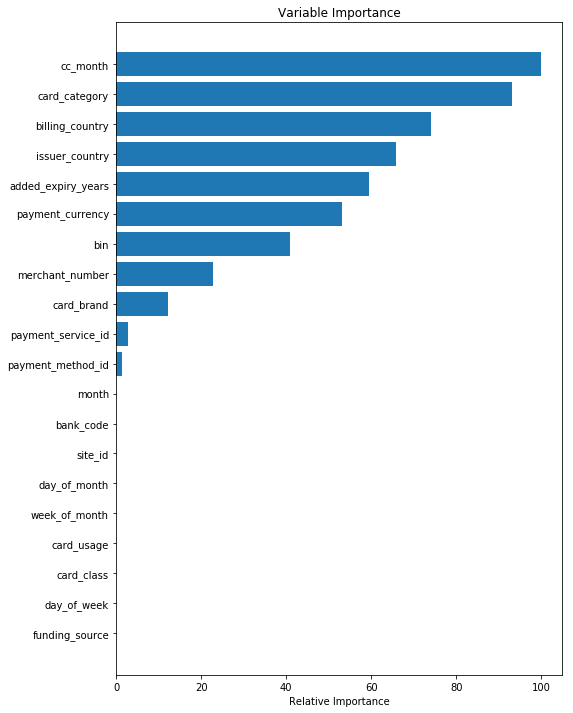

In [10]:
""" Train the model"""

#XGBoost Classifier
from xgboost import XGBClassifier
from src.web.preprocessing import *
# import xgboost as xgb
classifier = XGBClassifier

tuned_parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.2], #so called `eta` value
              'max_depth': [10],
              'min_child_weight': [11],
              'silent': [0],
              'subsample': [0.5],
              'colsample_bytree': [0.7],
#               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
              'n_estimators': [1000], #number of trees, change it to 1000 for better results  
              'missing':[-999],
              'max_delta_step':[1],  
              'seed': [1337]}

best_parameters = {
              'objective': 'binary:logistic',
              'learning_rate': 0.2, #so called `eta` value
              'max_depth': 10,
              'min_child_weight': 11,
              'silent': 0,
              'subsample': 0.5,
              'colsample_bytree': 0.7,
#               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
              'n_estimators': 1000, #number of trees, change it to 1000 for better results  
              'missing':-999,
              'seed': 1337}

model_file = ''
model_id = 'ML-ECO-1'
version = get_latest_version(model_id) + 1
model_name = model_id + '.' + str(version)
xgb_clf, result_d = build_and_train(eco[:900], classifier, tuned_parameters, 'xgbclassifier', model_file, best_param=best_parameters)
model_file, model_file_name = write_model(xgb_clf, model_name)
print("model_file is generated: ", model_file)
print("result_dict: ", result_d)


In [ ]:
""" Train the model"""

#XGBoost Classifier
from xgboost import XGBClassifier
# import xgboost as xgb
classifier = XGBClassifier

# tuned_parameters = {
#               'objective':['binary:logistic'],
#               'learning_rate': [0.2], #so called `eta` value
#               'max_depth': [10],
#               'min_child_weight': [11],
#               'silent': [0],
#               'subsample': [0.5],
#               'colsample_bytree': [0.7],
# #               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
#               'n_estimators': [1000], #number of trees, change it to 1000 for better results  
#               'missing':[-999],
#               'max_delta_step':[1],  
#               'seed': [1337]}

best_parameters = {
              'objective': 'binary:logistic',
              'learning_rate': 0.2, #so called `eta` value
              'max_depth': 10,
              'min_child_weight': 7,
              'max_delta_step': 0.5,
              'silent': 0,
              'subsample': 0.5,
              'colsample_bytree': 0.7,
#               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
              'n_estimators': 1000, #number of trees, change it to 1000 for better results  
              'missing':-999,
              'seed': 1337}

model_file = ''
model_id = 'ML-ECO-1'
version = get_latest_version(model_id) + 1
model_name = model_id + '.' + str(version)
xgb_clf, result_d = build_and_train(eco, classifier, None, 'xgbclassifier', model_file, best_param=best_parameters)
model_file, model_file_name = write_model(xgb_clf, model_name)
print("model_file is generated: ", model_file)
print("result_dict: ", result_d)


# df_bin_profile: (38193, 13)
Best Retry preprocessing pipeline ... 
training xgb ....... 
In EnhancedPipeline fit_predict ...
self.features_encoded: ['week_of_month', 'day_of_week', 'month', 'cc_month']


/var/spark/jupyter-notebooks/src/web/preprocessing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

Finish handle_feat_encoded.


/var/spark/jupyter-notebooks/src/web/preprocessing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[BIN] = pd.to_numeric(df[BIN], errors='coerce')


self.features_all:  ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'payment_amount_usd', 'Mean', 'Median', 'Max', 'StdDev', 'Max_99', 'max_99_diff', 'std_diff', 'median_diff', 'mean_diff']
In fit, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month']
['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id'

/var/spark/jupyter-notebooks/src/web/preprocessing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

Finish handle_feat_encoded.


/var/spark/jupyter-notebooks/src/web/preprocessing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[BIN] = pd.to_numeric(df[BIN], errors='coerce')
/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_encoded] size: (6097952, 20)


In [21]:
def insert_model_info(model_id, version, file_name, desc, model_type=MODEL_TYPE, algorithm='XGBClassifier', hyper_parameter=None, eval_metrics=None, extended_att=None):
    
    print("hyper_parameter: {}".format(hyper_parameter))
    """Inserts model info into Cassandra table"""
    if not extended_att:
        extended_att= "{}"
    
    mlp_session.execute(
    """
    INSERT INTO ml_model_storage (model_type, model_id, version, features_cat, features_encoded, features_num, repo_path, description, creation_date, modification_date, algorithm, hyper_parameter, eval_metrics, extended_attributes)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """,
    (model_type, model_id, version, json.dumps(FEATURES_CAT), json.dumps(FEATURES_ENCODED), json.dumps(FEATURES_NUM), file_name, desc, datetime.datetime.utcnow(), datetime.datetime.utcnow(), algorithm, hyper_parameter, eval_metrics, extended_att)
        
    )
    print("Model %s version %d is inserted into model repo" % (model_id, version))      

In [32]:
"""Upload model to Nexus repo and insert the model info into Cassandra table"""
import json

# start_date = '2018-01-01'
start_date = '2019-01-01'

end_date = '2019-03-31'

repo_path = upload_artifact(model_file_name)
preprocess_repo_path = handle_preprocessing_file(model_id, version) 
size_desc = str(", original size: %s (fail: %s, success: %s), balanced_size: %s" % (original_size, fail_size, success_size, original_size))
desc = '{}_{}_for_eco model. {}'.format(start_date, end_date, size_desc)
hyper_params = result_d.pop('hyper_params', None)
extended_att = {"preprocess_repo_path": preprocess_repo_path, "input_features": INPUT_FEATURES}
insert_model_info(model_id, version, repo_path, desc=desc, model_type=MODEL_TYPE,eval_metrics=json.dumps(result_d), 
                  hyper_parameter=json.dumps(hyper_params), extended_att=json.dumps(extended_att))

hyper_parameter: "{'objective': 'binary:logistic', 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 11, 'silent': 0, 'subsample': 0.5, 'colsample_bytree': 0.7, 'n_estimators': 1000, 'missing': -999, 'seed': 1337}"
Model ML-ECO-1 version 11 is inserted into model repo


In [72]:
eco_2019_04 = pd.read_csv(WORK_DIR + 'eco_2019_04.csv')
eco_2019_04.shape

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,15,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2859291, 48)

In [81]:
eco_2019_04 = eco_2019_04[eco_2019_04['added_expiry_years'] != '']
eco_2019_04.shape

(440406, 50)

In [84]:
y_pred_test = xgb_clf.predict(eco_2019_04)
y_pred_test

Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'cc_month', 'week_of_month', 'day_of_week', 'month']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'cc_month', 'week_of_month', 'day_of_week', 'month'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_encoded] size: (440406, 20)
# t

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1, 0, 0, ..., 0, 0, 0])

In [93]:
gp = eco.groupby(['card_class'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp[df_gp[('success', 'count')] > 0]

success          success_rate
                  sum    count             
card_class                                 
No Data found   42741   158102    27.033814
Consumer       858701  5996233    14.320674
Business        71770   517249    13.875329
Purchase         2236    16549    13.511390
Corporate        7847    66034    11.883272

In [46]:
%set_env SPARK_HOME=/opt/spark
from src.web.preprocessing import PreProcessing
import os
import findspark
os.environ['PYSPARK_SUBMIT_ARGS'] = """\
--master spark://10.62.42.243:7077 
--packages datastax:spark-cassandra-connector:2.3.1-s_2.11,anguenot:pyspark-cassandra:0.9.0
--driver-memory 42g
--executor-memory 30g
--conf spark.local.dir=/var/spark
--conf spark.network.timeout=420000
--conf spark.shuffle.registration.timeout=42000
--conf spark.driver.maxResultSize=43
--conf spark.files.overwrite=true
--conf num-executors=5
--py-files src.zip
pyspark-shell
"""

# 

# --py-files src.zip
# --conf spark.cores.max=32
# --conf spark.driver.cores=6
# --conf spark.executor.cores=8

import pyspark
from pyspark import SparkContext, SparkConf
findspark.init()
sc = pyspark.SparkContext(appName="ECOTraining")
sc._conf.set("spark.sql.execution.arrow.enabled", "true")
sc._conf.set('spark.driver.maxResultSize', '43')
sc._conf.set('spark.driver.cores', '6')
sc._conf.set('spark.executor.cores', '8')

# sc._conf.set("spark.cores.max", 6)
sc._conf.set("spark.local.dir", "/var/spark")
sc._conf.set("spark.files.overwrite", True)
# sc.addPyFile("src6.zip")
# # sc.addFile('src4.zip')

# sc.addPyFile('src/web/encoder.py')
# sc.addPyFile('src/web/preprocessing.py')
# sc.addPyFile('src/web/utils.py')
# sc.addPyFile('src/web/train_util.py')
sc

env: SPARK_HOME=/opt/spark


<SparkContext master=spark://10.62.42.243:7077 appName=ECOTraining>

In [47]:
""" Train the model"""

#XGBoost Classifier
from xgboost import XGBClassifier
# import xgboost as xgb
classifier = XGBClassifier

tuned_parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.2, 0.3, 0.5], #so called `eta` value
              'max_depth': [7, 10, 15],
              'min_child_weight': [7, 11, 15],
              'silent': [0],
              'subsample': [0.5],
              'colsample_bytree': [0.7],
#               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
              'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results  
              'missing':[-999],
              'max_delta_step':[0.5, 1],  
              'seed': [1337]}

# best_parameters = {
#               'objective': 'binary:logistic',
#               'learning_rate': 0.2, #so called `eta` value
#               'max_depth': 10,
#               'min_child_weight': 11,
#               'silent': 0,
#               'subsample': 0.5,
#               'colsample_bytree': 0.7,
# #               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
#               'n_estimators': 1000, #number of trees, change it to 1000 for better results  
#               'missing':-999,
#               'seed': 1337}

model_file = ''
model_id = 'ML-ECO-1'
version = get_latest_version(model_id) + 1
model_name = model_id + '.' + str(version)
xgb_clf, result_d = build_and_train(eco, classifier, tuned_parameters, 'xgbclassifier', model_file, best_param=None)
model_file, model_file_name = write_model(xgb_clf, model_name)
print("model_file is generated: ", model_file)
print("result_dict: ", result_d)


# df_bin_profile: (38193, 13)
Best Retry preprocessing pipeline ... 
# Tuning hyper-parameters for precision_weighted
pipe_param_grid  {'xgbclassifier__objective': ['binary:logistic'], 'xgbclassifier__learning_rate': [0.2, 0.3, 0.5], 'xgbclassifier__max_depth': [7, 10, 15], 'xgbclassifier__min_child_weight': [7, 11, 15], 'xgbclassifier__silent': [0], 'xgbclassifier__subsample': [0.5], 'xgbclassifier__colsample_bytree': [0.7], 'xgbclassifier__n_estimators': [500, 1000], 'xgbclassifier__missing': [-999], 'xgbclassifier__max_delta_step': [0.5, 1], 'xgbclassifier__seed': [1337]}
df_bin_profile is NONE


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 44 in stage 0.0 failed 4 times, most recent failure: Lost task 44.3 in stage 0.0 (TID 61, 10.62.43.19, executor 17): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 230, in main
    process()
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 225, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 372, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/spark/python/lib/pyspark.zip/pyspark/util.py", line 55, in wrapper
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.6/site-packages/spark_sklearn/grid_search.py", line 313, in fun
    local_X = X_bc.value
  File "/opt/spark/python/lib/pyspark.zip/pyspark/broadcast.py", line 109, in value
    self._value = self.load(self._path)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/broadcast.py", line 100, in load
    return pickle.load(f)
MemoryError

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:298)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:438)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:421)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:252)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$12.apply(RDD.scala:939)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$12.apply(RDD.scala:939)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2074)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2074)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1602)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1590)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1589)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1589)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1823)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1772)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1761)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2055)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2074)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:939)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:938)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:162)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 230, in main
    process()
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 225, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 372, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/spark/python/lib/pyspark.zip/pyspark/util.py", line 55, in wrapper
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.6/site-packages/spark_sklearn/grid_search.py", line 313, in fun
    local_X = X_bc.value
  File "/opt/spark/python/lib/pyspark.zip/pyspark/broadcast.py", line 109, in value
    self._value = self.load(self._path)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/broadcast.py", line 100, in load
    return pickle.load(f)
MemoryError

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:298)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:438)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:421)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:252)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$12.apply(RDD.scala:939)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$12.apply(RDD.scala:939)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2074)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2074)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
